# Typical architecture of a regression network.

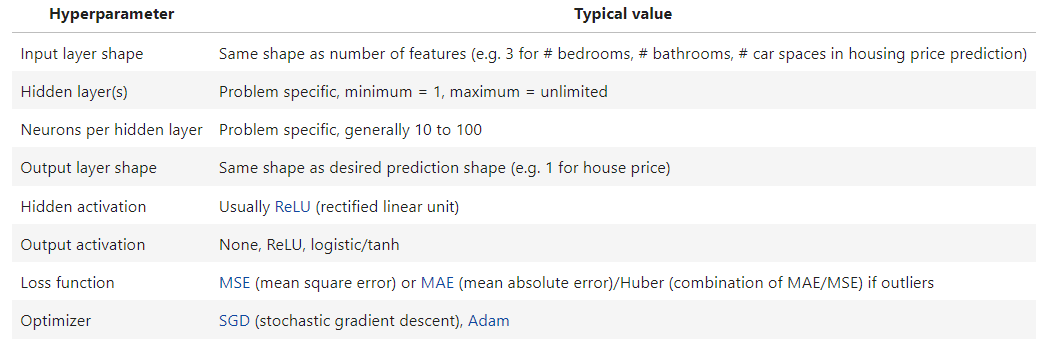

In [ ]:
#Import TensorFlow and check its version to ensure compatibility
#TensorFlow 2.x+ is required for modern deep learning features and Keras integration
import tensorflow as tf
print(tf.__version__)  # Check the TensorFlow version to ensure it's 2.x+

#Import the datetime module to display the current date and time
#This helps track when the notebook was last executed (useful for version control or logging)
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")  # Display the current date and time

2.17.0
Notebook last run (end-to-end): 2024-10-16 20:23:50.114515


##Regression input shapes and output shapes

### Creating Tensors Directly

In [ ]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])  # Create a tensor with house features (as strings)
house_price = tf.constant([939700])  # Create a tensor with the target price (as a single value)
house_info, house_price  # Display the tensors

house_info.shape  # Get the shape of the 'house_info' tensor

### Converting NumPy Arrays to TensorFlow Tensors

In [ ]:
# Standardize the features for better performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit and transform training data
X_test = sc.transform(X_test)  # Transform test data

# Step 4: Convert NumPy arrays to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)  # Convert training features to tensor
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)  # Convert training labels to tensor
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)  # Convert test features to tensor
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)  # Convert test labels to tensor

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

## Creating and training a model.

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)  # seed value for consistent results

# Create a simple model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # Dense layer with 1 neuron (output = 1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,                # mae (mean absolute error) as the loss function
              optimizer=tf.keras.optimizers.SGD(),     # SGD (stochastic gradient descent) optimizer
              metrics=["mae"])                         # Evaluation metric: mean absolute error

# Fit the model to the data
model.fit(tf.expand_dims(X, axis=-1),  # Expand dimensions of input data to match expected shape
          y,                           # Target data
          epochs=5)                    # Number of training iterations (epochs)

In [ ]:
# Check out X and y
X, y

In [ ]:
# Make a prediction with the model
model.predict([17.0])

## Improving the model

To improve our model, we alter almost every part of the 3 steps we went through before.

* Creating a model - here you might want to add more **layers**, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
* Fitting a model - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

**The most important hyperparameter in a neural network is the learning rate**

To set a custom learning rate when using the Adam optimizer, you can do it like this:



In [ ]:
# Create a model using the Sequential API with additional hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,), name="input_layer"),                   # Input layer specifying shape
    tf.keras.layers.Dense(6, activation='relu', name="hidden_layer_1"),      # First hidden layer with 6 neurons
    tf.keras.layers.Dense(6, activation='relu', name="hidden_layer_2"),      # Second hidden layer with 6 neurons
    tf.keras.layers.Dense(1, name="output_layer")                            # Output layer for predictions
], name="model_1")  # Naming the model

# Compile the model with the Adam optimizer and binary crossentropy loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train,           # Input features for training
          y_train,           # Target labels for training
          epochs=100,        # Number of times to go through the entire dataset (training iterations)
          batch_size=32,     # Optional: Specify the batch size for training
          verbose=1)         # Optional: Set verbose to 1 to see training progress

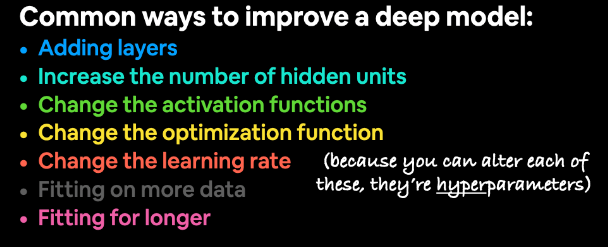

## Visualizing the model

Calling **summary()** on our model shows us the layers it contains, the output shape and the number of parameters.

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)  # Ensures that the model produces consistent results across multiple runs

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),  # Dense layer with 10 neurons; defines input shape as 1 feature
    tf.keras.layers.Dense(1, name="output_layer")                     # Output layer with 1 neuron for the final prediction
], name="model_1")  # Naming the entire model for easy identification

# Compile the model
model.compile(loss=tf.keras.losses.mae,                # MAE (mean absolute error) as the loss function for regression tasks
              optimizer=tf.keras.optimizers.SGD(),     # SGD (stochastic gradient descent) optimizer for training
              metrics=["mae"])                         # Evaluation metric: mean absolute error to assess performance during training

# Display model summary
model.summary()  # Prints a summary of the model architecture, including each layer's name, output shape, and number of parameters

In [ ]:
# Fit the model to the training data
model.fit(X_train,           # Input features for training
          y_train,           # Target labels for training
          epochs=100,        # Number of times to go through the entire dataset (training iterations)
          verbose=0)         # Controls output during training: 0 = silent, 1 = progress bar, 2 = one line per epoch

**Tip**
* Alongside summary, you can also view a 2D plot of the model using plot_model().
* Visualizing more complicated models can be very helpful for debugging.
* Visualizing a model is particularly helpful when you run into input and output shape mismatches.
* If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [ ]:
# Import the plot_model function from Keras utilities
from tensorflow.keras.utils import plot_model

# Visualize the model architecture and save it as an image
plot_model(model,             # The model to be visualized
           show_shapes=True,  # Show the shapes of the layers in the output diagram
           to_file='model_architecture.png')  # Specify the filename to save the diagram

## Evaluating predictions

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.



In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [ ]:
# Check the test label tensor values
y_test

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

**Remember** how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using **squeeze()**, it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

**Note**: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [ ]:
# Shape before squeeze()
y_preds.shape

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

In [ ]:
# What do they look like?
y_test, y_preds.squeeze()

Okay, now we know how to make our y_test and y_preds tenors the same shape, let's use our evaluation metrics.



In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).



In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

* Get more data - get more examples for your model to train on (more opportunities to learn patterns).
* Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* Train for longer - give your model more of a chance to find the patterns in the data.

**Note**: Build different neural networks where each will have different hyperparameters. This way, you become more efficient

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)

# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)

# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

## Comparing results

**Note**: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

**This is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.**

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

## Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

* The SavedModel format (default).
* The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

## Loading a model

We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

## For plotting history performance and compare

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).

**Which one should you use?**

With neural networks you'll tend to favour **normalization** **as they tend to prefer values between 0 and 1** (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Let's evaluate the model on normalized test set.



In [ ]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

And finally, let's compare the results from insurance_model_2 (trained on non-normalized data) and insurance_model_3 (trained on normalized data).

In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae